<a href="https://colab.research.google.com/github/shaheen-senpai/S5LABDS/blob/main/heart_atk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Heart Attack Prediction Model</h1>
</div>

Given medical data collected on patients, we can predict if a person has a risk of heart attack.

# Importing all the libraries needed

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

results = {}

# Inserting data set



## Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this **data set** contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help

## Attribute Information
1. Age: age of the patient [years]  
2. Sex: sex of the patient [M: Male, F: Female]  
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical   Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]  
4. RestingBP: resting blood pressure [mm Hg]  
5. Cholesterol: serum cholesterol [mm/dl]  
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]  
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]  
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]  
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]  
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]  
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]  
12. HeartDisease: output class [1: heart disease, 0: Normal]  

## Source
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:  

* Cleveland: 303 observations  
* Hungarian: 294 observations 
* Switzerland: 123 observations  
* Long Beach VA: 200 observations  
* Stalog (Heart) Data Set: 270 observations  
* Total: 1190 observations  
* Duplicated: 272 observations  

Final dataset: 918 observations   

## Citation
fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

## Acknowledgements
Creators:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: 5. Robert Detrano, M.D., Ph.D.  

Donor:  
David W. Aha (aha '@' ics.uci.edu) (714) 856-8779  

In [99]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [100]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

As we can see the string data in the dataframe is in the form of object, we need to convert it back to string to work on it

In [101]:
string_col = data.select_dtypes(include="object").columns
data[string_col]=data[string_col].astype("string")

data.dtypes

Age                 int64
Sex                string
ChestPainType      string
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         string
MaxHR               int64
ExerciseAngina     string
Oldpeak           float64
ST_Slope           string
HeartDisease        int64
dtype: object

The **describe()** function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [102]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


# Exploratory Data Analysis

Out Come of this phase is as given below :

* Understanding the given dataset and help clean up the given dataset.
* It gives a clear picture of the features and the relationships between them.
* Providing guidelines for essential variables and leaving behind/removing non-essential variables.
* Handling Missing values or human error.
* Identifying outliers.
* EDA process would be maximizing insights of a dataset.
* This process is time-consuming but very effective.

## Correlation Matrix

Its necessary to remove correlated variables to improve your model.  
One can find correlations using pandas “.corr()” function and can visualize the correlation matrix using plotly express.    

* Lighter shades represents positive correlation
* Darker shades represents negative correlation

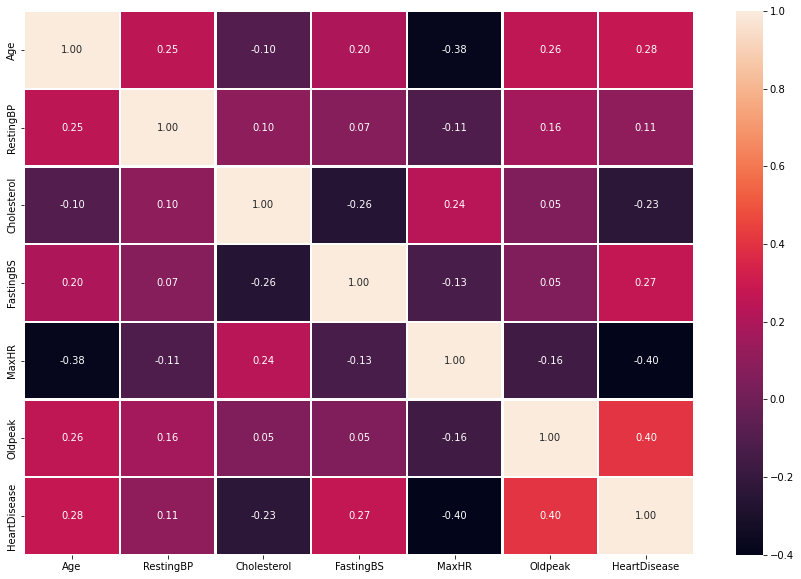

In [103]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f",linewidths="1.2")
plt.show()

Here we can see Heart Disease has a high negative correlation with "MaxHR" and somewhat negative correlation with "Cholesterol", where as here positive correatlation with "Oldpeak","FastingBS" and "RestingBP"

## Distribution of Heat Diseases with respect to male and female

In [104]:
fig=px.histogram(data, 
                 x="HeartDisease",
                 color="Sex",
                 hover_data=data.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")

fig.show()

## Types of Chest Pain

In [105]:
fig=px.histogram(data,
                 x="ChestPainType",
                 color="Sex",
                 hover_data=data.columns,
                 title="Types of Chest Pain"
                )
fig.show()

## Sex Ratio in the Data

In [106]:
fig=px.histogram(data,
                 x="Sex",
                 hover_data=data.columns,
                 title="Sex Ratio in the Data")
fig.show()

## Distribution of Resting ECG

In [107]:
fig=px.histogram(data,
                 x="RestingECG",
                 hover_data=data.columns,
                 title="Distribution of Resting ECG")
fig.show()

## Bivariate Distribution
To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

[]

<Figure size 1080x720 with 0 Axes>

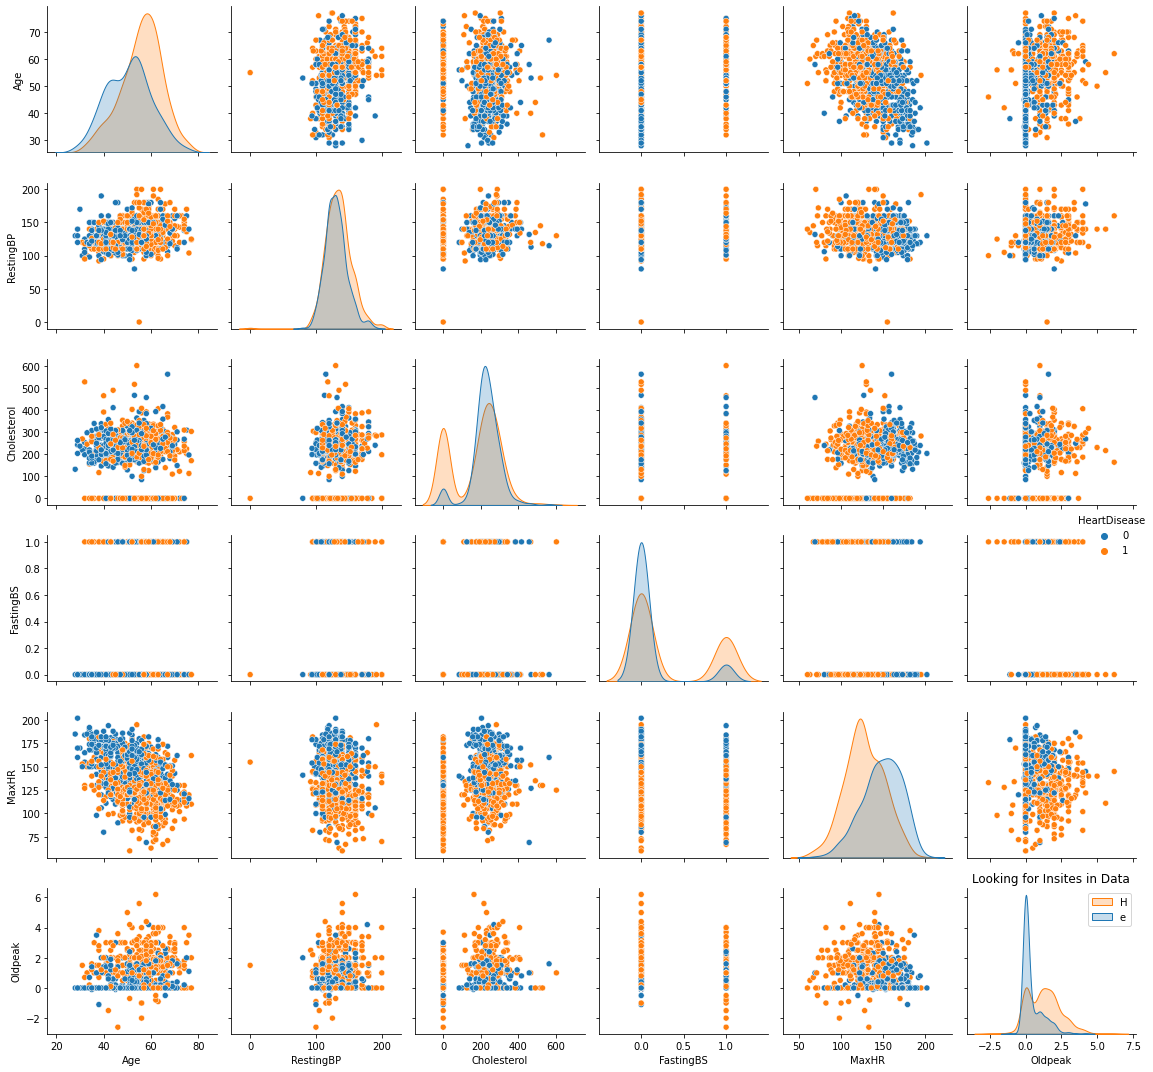

In [108]:
plt.figure(figsize=(15,10))
sns.pairplot(data,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

## Outliers

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables.The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary:

* Minimum
* First quartile
* Median
* Third quartile
* Maximum.   

In the simplest box plot the central rectangle spans the first quartile to the third quartile (the interquartile range or IQR).A segment inside the rectangle shows the median and “whiskers” above and below the box show the locations of the minimum and maximum.

In [109]:
fig = px.box(data,y="Age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()

fig = px.box(data,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP",color="Sex")
fig.show()

fig = px.box(data,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol")
fig.show()

fig = px.box(data,y="Oldpeak",x="HeartDisease",title=f"Distrubution of Oldpeak")
fig.show()

fig = px.box(data,y="MaxHR",x="HeartDisease",title=f"Distrubution of MaxHR")
fig.show()


# Data Preprocessing

Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

## 1. Handling Null Values

In any real-world dataset, there are always few null values. It doesn’t really matter whether it is a regression, classification or any other kind of problem, no model can handle these NULL or NaN values on its own so we need to intervene.

In [110]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

we can see our data does not have any null values

## 2. Feature Scaling

Data Scaling is a data preprocessing step for numerical features. Many machine learning algorithms like Gradient descent methods, KNN algorithm, linear and logistic regression, etc. require data scaling to produce good results.
Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it.  

(a) **Distance Based Algorithms :**    
Distance algorithms like "KNN", "K-means" and "SVM" are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity. Whem two features have different scales, there is a chance that higher weightage is given to features with higher magnitude. This will impact the performance of the machine learning algorithm and obviously, we do not want our algorithm to be biassed towards one feature.   
     
Therefore, we scale our data before employing a distance based algorithm so that all the features contribute equally to the result.  

(b) **Tree-Based Algorithms :**   
Tree-based algorithms, on the other hand, are fairly insensitive to the scale of the features. Think about it, a decision tree is only splitting a node based on a single feature. The decision tree splits a node on a feature that increases the homogeneity of the node. This split on a feature is not influenced by other features.    
      
So, there is virtually no effect of the remaining features on the split. This is what makes them invariant to the scale of the features!    


### Robust Scaler

When working with outliers we can use Robust Scaling for scakling our data, It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range. This range is also called an Interquartile range. The median and the interquartile range are then stored so that it could be used upon future data using the transform method. If outliers are present in the dataset, then the median and the interquartile range provide better results and outperform the sample mean and variance. RobustScaler uses the interquartile range so that it is robust to outliers.  

### MinMax Scaler

There is another way of data scaling, where the minimum of feature is made equal to zero and the maximum of feature equal to one. MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution.

The MinMax scaling is done using:

x_std = (x – x.min(axis=0)) / (x.max(axis=0) – x.min(axis=0))

x_scaled = x_std * (max – min) + min

Where,

* min, max = feature_range
* x.min(axis=0) : Minimum feature value
* x.max(axis=0):Maximum feature value  

### Standard Scaler

Standard Scaler helps to get standardized distribution, with a zero mean and standard deviation of one (unit variance). It standardizes features by subtracting the mean value from the feature and then dividing the result by feature standard deviation. 

The standard scaling is calculated as: 


z = (x - u) / s

Where,

* z is scaled data.
* x is to be scaled data.
* u is the mean of the training samples
* s is the standard deviation of the training samples.  

In [111]:
# creating a copy of df
df = data

# define the columns to be encoded and scaled
cat_cols = ['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','restecg','ST_Slope']
con_cols = ["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]

# instantiating any one of the scaler
scaler = StandardScaler()
#scaler = RobustScaler()
#scaler = MinMaxScaler()

# scaling the continuous featuree
df[con_cols] = scaler.fit_transform(df[con_cols])
print(df)

          Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0   -1.433140   M           ATA   0.410909     0.825070          0     Normal   
1   -0.478484   F           NAP   1.491752    -0.171961          0     Normal   
2   -1.751359   M           ATA  -0.129513     0.770188          0         ST   
3   -0.584556   F           ASY   0.302825     0.139040          0     Normal   
4    0.051881   M           NAP   0.951331    -0.034755          0     Normal   
..        ...  ..           ...        ...          ...        ...        ...   
913 -0.902775   M            TA  -1.210356     0.596393          0     Normal   
914  1.536902   M           ASY   0.627078    -0.053049          1     Normal   
915  0.370100   M           ASY  -0.129513    -0.620168          0     Normal   
916  0.370100   F           ATA  -0.129513     0.340275          0        LVH   
917 -1.645286   M           NAP   0.302825    -0.217696          0     Normal   

        MaxHR ExerciseAngin

## 3. Handling Categorical Variables

Categorical variables/features are any feature type can be classified into two major types:

* Nominal
* Ordinal  

Nominal variables are variables that have two or more categories which do not have any kind of order associated with them. For example, if gender is classified into two groups, i.e. male and female, it can be considered as a nominal variable.Ordinal variables, on the other hand, have “levels” or categories with a particular order associated with them. For example, an ordinal categorical variable can be a feature with three different levels: low, medium and high. Order is important.  
   
We have to know that computers do not understand text data and thus, we need to convert these categories to numbers. A simple way of doing that can be to use : 

### a. Label Encoding

**For Tree based Machine Learning Algorithms the best way to go is with Label Encoding**   
LabelEncoder can turn [dog,cat,dog,mouse,cat] into [1,2,1,3,2], but then the imposed ordinality means that the average of dog and mouse is cat. Still there are algorithms like decision trees and random forests that can work with categorical variables just fine and LabelEncoder can be used to store values using less disk space.   

### b. One Hot Encoding

**For not Tree based Machine Learning Algorithms the best way to go will be to use One-Hot Encoding**   
* One-Hot-Encoding has the advantage that the result is binary rather than ordinal and that everything sits in an orthogonal vector space.
* The disadvantage is that for high cardinality, the feature space can really blow up quickly and you start fighting with the curse of dimensionality. In these cases, I typically employ one-hot-encoding followed by PCA for dimensionality reduction. I find that the judicious combination of one-hot plus PCA can seldom be beat by other encoding schemes. PCA finds the linear overlap, so will naturally tend to group similar features into the same feature

In [112]:
df[string_col].head()
for col in string_col:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(df[col].value_counts())

The distribution of categorical valeus in the Sex is : 
M    725
F    193
Name: Sex, dtype: Int64
The distribution of categorical valeus in the ChestPainType is : 
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: Int64
The distribution of categorical valeus in the RestingECG is : 
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: Int64
The distribution of categorical valeus in the ExerciseAngina is : 
N    547
Y    371
Name: ExerciseAngina, dtype: Int64
The distribution of categorical valeus in the ST_Slope is : 
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: Int64


In [113]:
df_tree = df.apply(LabelEncoder().fit_transform)
df_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


In [114]:
df_nontree=pd.get_dummies(df,columns=string_col,drop_first=False)
# Getting the target column at the end
target="HeartDisease"
y=df_nontree[target].values
df_nontree.drop("HeartDisease",axis=1,inplace=True)
df_nontree=pd.concat([df_nontree,df[target]],axis=1)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,-1.433140,0.410909,0.825070,0,1.382928,-0.832432,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,-0.478484,1.491752,-0.171961,0,0.754157,0.105664,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,-1.751359,-0.129513,0.770188,0,-1.525138,-0.832432,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,-0.584556,0.302825,0.139040,0,-1.132156,0.574711,1,0,1,0,...,0,0,1,0,0,1,0,1,0,1
4,0.051881,0.951331,-0.034755,0,-0.581981,-0.832432,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0


# Training Machine Learning Models



## NON-TREE BASED ALGORITHMS



### 1. Using Logistic Regression

Logistic regression is a calculation used to predict a binary outcome: either something happens, or does not. This can be exhibited as Yes/No, Pass/Fail, Alive/Dead, etc.   

Independent variables are analyzed to determine the binary outcome with the results falling into one of two categories. The independent variables can be categorical or numeric, but the dependent variable is always categorical. Written like this:    

P(Y=1|X) or P(Y=0|X)    

It calculates the probability of dependent variable Y, given independent variable X.    

This can be used to calculate the probability of a word having a positive or negative connotation (0, 1, or on a scale between). Or it can be used to determine the object contained in a photo (tree, flower, grass, etc.), with each object given a probability between 0 and 1.    

In [115]:
x1 = df_nontree.drop("HeartDisease",axis=1)
y1 = df_nontree["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(x1, y1, train_size=0.8, shuffle=True, random_state=0)
#print(X_train, X_test, y_train, y_test)

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("---------- Logistic Regression ----------")
print("            Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred) * 100))
print("            F1 Score: {:.2f} %".format(f1_score(y_test, y_pred) * 100))
print("              Recall: {:.2f} %".format(recall_score(y_test, y_pred) * 100))
print("           Precision: {:.2f} %".format(precision_score(y_test, y_pred) * 100))
print("-----------------------------")
print(confusion_matrix(y_test, y_pred))
results["Logistic Regression"] = confusion_matrix(y_test, y_pred)

---------- Logistic Regression ----------
            Accuracy: 82.61 %
            F1 Score: 85.71 %
              Recall: 89.72 %
           Precision: 82.05 %
-----------------------------
[[56 21]
 [11 96]]


### 2. Using Naive Bayers

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.  
   
GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian: 
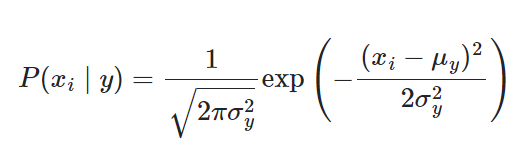

In [116]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("---------- Naive Bayers ----------")
print("            Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred) * 100))
print("            F1 Score: {:.2f} %".format(f1_score(y_test, y_pred) * 100))
print("              Recall: {:.2f} %".format(recall_score(y_test, y_pred) * 100))
print("           Precision: {:.2f} %".format(precision_score(y_test, y_pred) * 100))
print("-----------------------------")
print(confusion_matrix(y_test, y_pred))
results["Naive Bayers"] = confusion_matrix(y_test, y_pred)

---------- Naive Bayers ----------
            Accuracy: 84.24 %
            F1 Score: 86.64 %
              Recall: 87.85 %
           Precision: 85.45 %
-----------------------------
[[61 16]
 [13 94]]


### 3. Using SVM (Support Vector Machines)

A support vector machine (SVM) uses algorithms to train and classify data within degrees of polarity, taking it to a degree beyond X/Y prediction.   
Using SVM, the more complex the data, the more accurate the predictor will become.  
SVM allows for more accurate machine learning because it’s multidimensional.  

In [117]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("---------- Support Vector Machine ----------")
print("            Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred) * 100))
print("            F1 Score: {:.2f} %".format(f1_score(y_test, y_pred) * 100))
print("              Recall: {:.2f} %".format(recall_score(y_test, y_pred) * 100))
print("           Precision: {:.2f} %".format(precision_score(y_test, y_pred) * 100))
print("-----------------------------")
print(confusion_matrix(y_test, y_pred))
results["Support Vector Machine"] = confusion_matrix(y_test, y_pred)

---------- Support Vector Machine ----------
            Accuracy: 84.24 %
            F1 Score: 86.88 %
              Recall: 89.72 %
           Precision: 84.21 %
-----------------------------
[[59 18]
 [11 96]]


### 4. Using K-nearest Neighbors

The optimal K value usually found is the square root of N, where N is the total number of samples

K-nearest neighbors (k-NN) is a pattern recognition algorithm that uses training datasets to find the k closest relatives in future examples.

When k-NN is used in classification, you calculate to place data within the category of its nearest neighbor. If k = 1, then it would be placed in the class nearest 1. K is classified by a plurality poll of its neighbors.

In [118]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("---------- K-nearest Neighbors ----------")
print("            Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred) * 100))
print("            F1 Score: {:.2f} %".format(f1_score(y_test, y_pred) * 100))
print("              Recall: {:.2f} %".format(recall_score(y_test, y_pred) * 100))
print("           Precision: {:.2f} %".format(precision_score(y_test, y_pred) * 100))
print("-----------------------------")
print(confusion_matrix(y_test, y_pred))
results["K-nearest Neighbors"] = confusion_matrix(y_test, y_pred)

---------- K-nearest Neighbors ----------
            Accuracy: 86.96 %
            F1 Score: 88.99 %
              Recall: 90.65 %
           Precision: 87.39 %
-----------------------------
[[63 14]
 [10 97]]


## TREE BASED ALGORITHM



### 1. Using Decision tree Classifier

A decision tree is a supervised learning algorithm that is perfect for classification problems, as it’s able to order classes on a precise level. It works like a flow chart, separating data points into two similar categories at a time from the “tree trunk” to “branches,” to “leaves,” where the categories become more finitely similar. This creates categories within categories, allowing for organic classification with limited human supervision.

In [119]:
x2 = df_tree.drop("HeartDisease",axis=1)
y2 = df_tree["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, train_size=0.8, shuffle=True, random_state=0)
#print(X_train, X_test, y_train, y_test)

clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("---------- Decision tree Classifier ----------")
print("            Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred) * 100))
print("            F1 Score: {:.2f} %".format(f1_score(y_test, y_pred) * 100))
print("              Recall: {:.2f} %".format(recall_score(y_test, y_pred) * 100))
print("           Precision: {:.2f} %".format(precision_score(y_test, y_pred) * 100))
print("-----------------------------")
print(confusion_matrix(y_test, y_pred))
results["Decision tree Classifier"] = confusion_matrix(y_test, y_pred)

---------- Decision tree Classifier ----------
            Accuracy: 77.17 %
            F1 Score: 78.79 %
              Recall: 72.90 %
           Precision: 85.71 %
-----------------------------
[[64 13]
 [29 78]]


### 2. Using Random Forest Classifier

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

The fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds. In data science speak, the reason that the random forest model works so well is:

* A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.
*  The low correlation between models is the key,uncorrelated models can produce ensemble predictions that are more accurate than any of the individual predictions.  
The reason for this wonderful effect is that the trees protect each other from their individual errors. While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction.

In [120]:
rf = RandomForestClassifier(n_estimators=200,criterion="gini")
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("---------- Random Forest Classifier ----------")
print("            Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred) * 100))
print("            F1 Score: {:.2f} %".format(f1_score(y_test, y_pred) * 100))
print("              Recall: {:.2f} %".format(recall_score(y_test, y_pred) * 100))
print("           Precision: {:.2f} %".format(precision_score(y_test, y_pred) * 100))
print("-----------------------------")
print(confusion_matrix(y_test, y_pred))
results["Random Forest Classifier"] = confusion_matrix(y_test, y_pred)

---------- Random Forest Classifier ----------
            Accuracy: 85.33 %
            F1 Score: 87.67 %
              Recall: 89.72 %
           Precision: 85.71 %
-----------------------------
[[61 16]
 [11 96]]


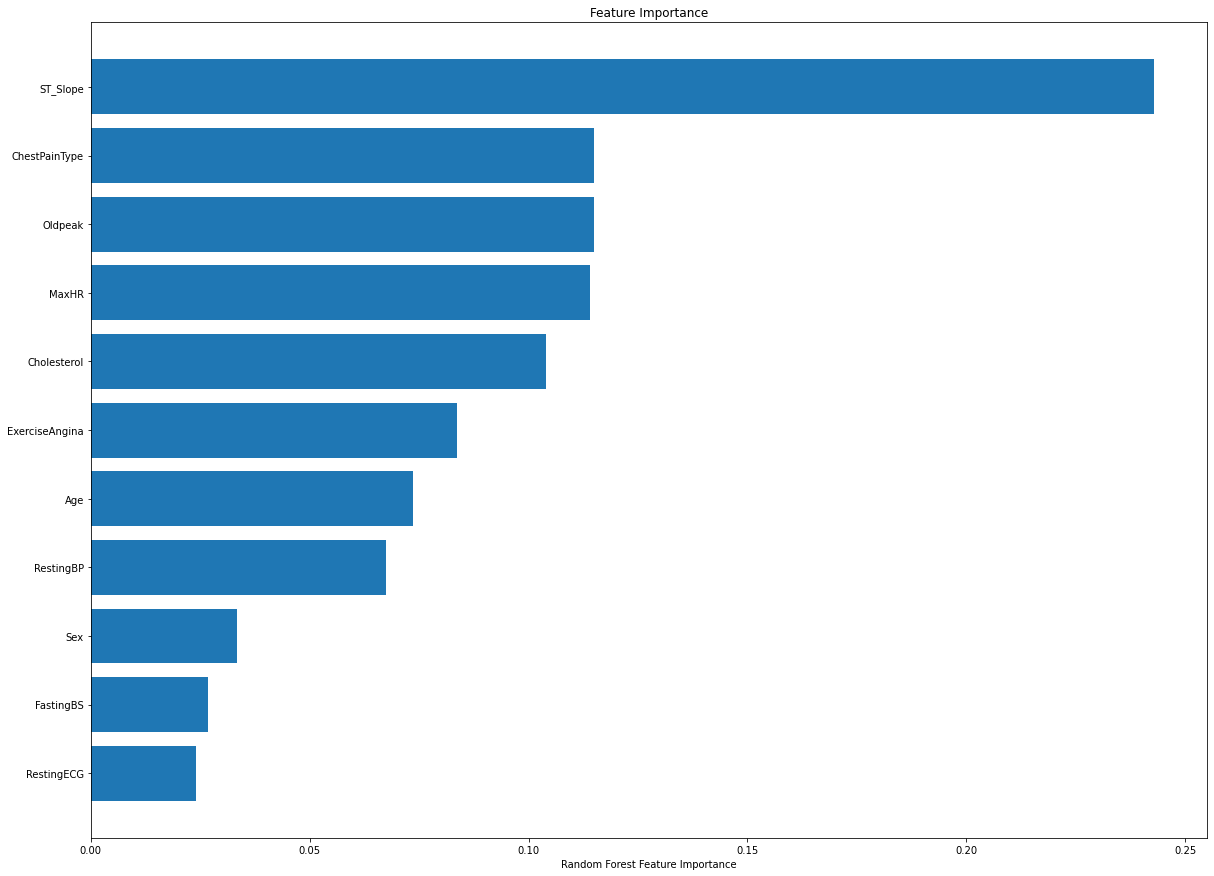

In [121]:
## Checking Feature importance 
feature_col_tree = df_tree.columns.to_list()
feature_col_tree.remove(target)

plt.figure(figsize=(20,15))
importance = rf.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[feature_col_tree[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
#plt.tight_layout()
plt.show()

### 3. Using XGBoost 

Unlike many other algorithms, XGBoost is an ensemble learning algorithm meaning that it combines the results of many models, called base learners to make a prediction.

Just like in Random Forests, XGBoost uses Decision Trees as base learners:

However, the trees used by XGBoost are a bit different than traditional decision trees. They are called CART trees (Classification and Regression trees) and instead of containing a single decision in each “leaf” node, they contain real-value scores of whether an instance belongs to a group. After the tree reaches max depth, the decision can be made by converting the scores into categories using a certain threshold.

In [122]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("---------- XGBoost ----------")
print("            Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred) * 100))
print("            F1 Score: {:.2f} %".format(f1_score(y_test, y_pred) * 100))
print("              Recall: {:.2f} %".format(recall_score(y_test, y_pred) * 100))
print("           Precision: {:.2f} %".format(precision_score(y_test, y_pred) * 100))
print("-----------------------------")
print(confusion_matrix(y_test, y_pred))
results["XGBoost"] = confusion_matrix(y_test, y_pred)

---------- XGBoost ----------
            Accuracy: 87.50 %
            F1 Score: 89.50 %
              Recall: 91.59 %
           Precision: 87.50 %
-----------------------------
[[63 14]
 [ 9 98]]


# Comparing Different Confusion Matrix

* A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm.   

* Confusion matrices can help with side-by-side comparisons of different classification methods. You can see not only how accurate one model is over the other, but also see more granularly how a model does in sensitivity or specificity, as those might be more important factors than general accuracy itself.

* Confusion matrices are widely used because they give a better idea of a model's performance than classification accuracy does.

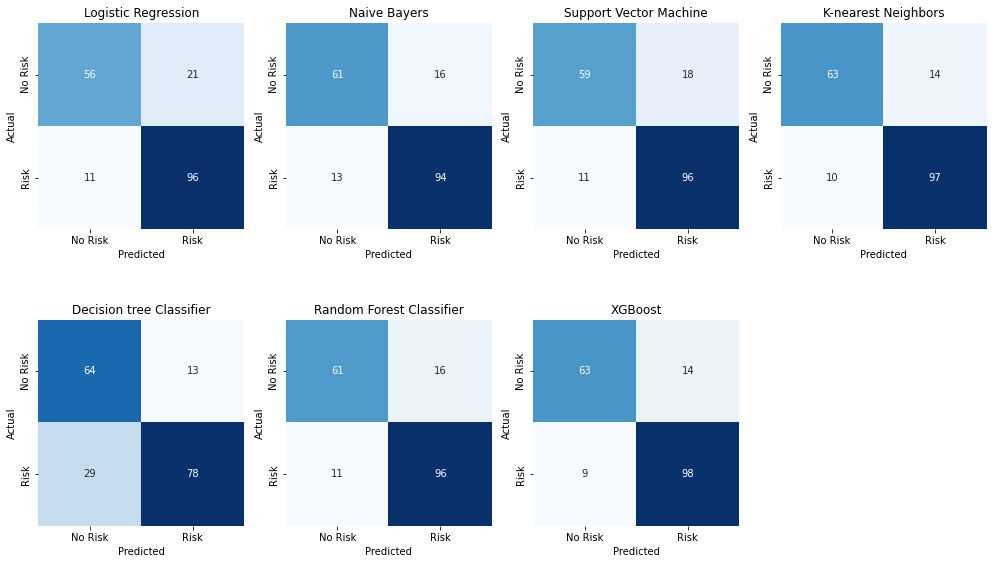

In [123]:
# Confusion matrices
plt.figure(figsize=(17, 10))
i=0
for figure in results.keys():
    plt.subplot(2, 4, i + 1)
    sns.heatmap(results[figure], annot=True, square=True, cbar=False,
                xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'], cmap='Blues')
    plt.title(figure)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    i=i+1
plt.show()

# Conclusion

In this case, it is better to maximize the recall because we do not want to leave people at risk of heart attack unattended.

We try to minimize the false negative number.

The cost of acting is not the most important. Prevention is better than cure.

Hence, the best model is XGBoost !